In [1]:
#importing the libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
#importing and loading the mnist dataset
mnist = tf.keras.datasets.mnist
(x_train1, y_train1),(x_test1,y_test1) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#displaying the shape of the test and training instances

print('x_train shape:', x_train1.shape)
print(x_train1.shape[0], 'train samples')
print(x_test1.shape[0], 'test samples')
num_classes=len(np.unique(y_train1))
print(f'num of classes = {num_classes}')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
num of classes = 10


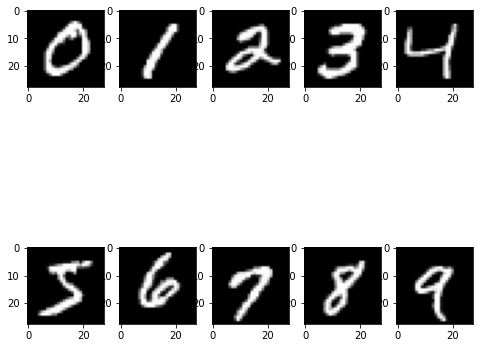

In [4]:
#display one image from each class
(x,id) = np.unique(y_train1, return_index=True)
plt.figure(figsize=(8,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train1[id[i]],cmap="gray")

In [5]:
#normalizing the dataset using min-max normalization

x_train1 = x_train1.astype('float32')
x_test1 = x_test1.astype('float32')
x_train1/= 255
x_test1 /= 255


**For MNIST dataset**

**Metadata**

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Q1: Design a CNN with:
* One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
* One Pooling layer which uses MAXPOOLING with stride =2.
* One hidden layer having number of neurons = 100
* Note: use ReLU activation function after each convolution layer.

In [6]:
#Building the CNN model

model1=tf.keras.models.Sequential()
model1.add(tf.keras.Input(shape=(28,28,1)))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5),activation="relu", padding= "same"))

model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(100, activation="relu"))
model1.add(tf.keras.layers.Dense(10, activation="softmax"))




In [7]:
#Compiling the above CNN model

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001
model1.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 629,142
Trainable params: 629,142
Non-trainable params: 0
__________________________________________________

In [9]:
history_1 = model1.fit(x_train1, y_train1, batch_size=64, epochs=10,validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 14s 4ms/step - loss: 0.1754 - accuracy: 0.9482 - val_loss: 0.0657 - val_accuracy: 0.9808
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0551 - accuracy: 0.9832 - val_loss: 0.0464 - val_accuracy: 0.9865
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0433 - val_accuracy: 0.9885
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0395 - val_accuracy: 0.9905
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0460 - val_accuracy: 0.9880
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0537 - val_accuracy: 0.9877
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0520 - val_accuracy: 0.9887
Epoch

In [10]:
score = model1.evaluate(x_test1, y_test1, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.04223034903407097
Test accuracy: 0.9890999794006348


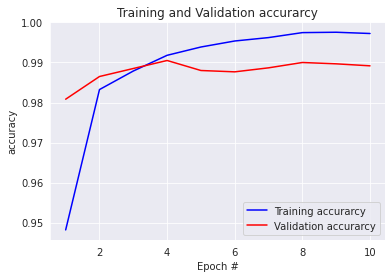

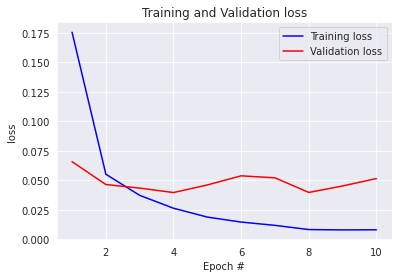

In [11]:
import seaborn as sns
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc1 = history_1.history['accuracy']
val_acc1 = history_1.history['val_accuracy']
loss1 = history_1.history['loss']
val_loss1 = history_1.history['val_loss']

epochs = range(1, len(acc1) + 1)

#Train and validation accuracy
plt.plot(epochs, acc1, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc1, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss1, 'b', label='Training loss')
plt.plot(epochs, val_loss1, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


Q2: Design a CNN with:
* Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1 and, 
padding =0
* One Pooling layer which uses MAXPOOLING with stride =2.
* One hidden layer having number of neurons = 100
* Note: use ReLU activation function after each convolution layer.

**For MNIST dataset**

In [12]:
#Building the CNN model

model2=tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(28,28,1)))

model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu", padding= "same"))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu", padding= "same"))

model2.add(tf.keras.layers.MaxPooling2D(pool_size=(5,5)))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(100, activation="relu"))
model2.add(tf.keras.layers.Dense(10, activation="softmax"))




In [14]:
#Compiling the above CNN model

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001
model2.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


In [15]:
history_2= model2.fit(x_train1, y_train1, batch_size=64, epochs=10,validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 5s 5ms/step - loss: 0.2156 - accuracy: 0.9344 - val_loss: 0.0605 - val_accuracy: 0.9817
Epoch 2/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0607 - val_accuracy: 0.9835
Epoch 3/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0400 - val_accuracy: 0.9900
Epoch 4/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 5/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0362 - val_accuracy: 0.9917
Epoch 6/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 7/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0357 - val_accuracy: 0.9922
Epoch 

In [16]:
score = model2.evaluate(x_test1, y_test1, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.025771813467144966
Test accuracy: 0.9923999905586243


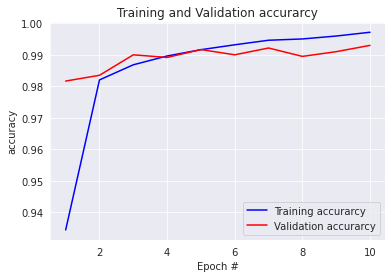

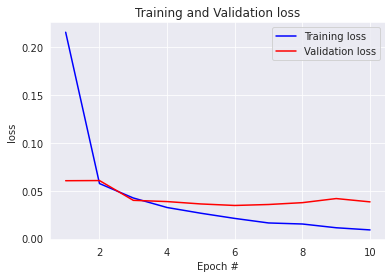

In [17]:
import seaborn as sns
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc2 = history_2.history['accuracy']
val_acc2 = history_2.history['val_accuracy']
loss2 = history_2.history['loss']
val_loss2 = history_2.history['val_loss']

epochs = range(1, len(acc1) + 1)

#Train and validation accuracy
plt.plot(epochs, acc2, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc2, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss2, 'b', label='Training loss')
plt.plot(epochs, val_loss2, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


Q3: Design the LeNet-5 architecture 

In [18]:
model_5 = tf.keras.models.Sequential()

model_5.add(tf.keras.Input(shape=((28, 28, 1))))

model_5.add(tf.keras.layers.Conv2D(6, kernel_size = (5,5), padding='same', activation='tanh', strides = (1,1)))
model_5.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2), strides = (2,2)))
model_5.add(Dropout(0.1))

model_5.add(tf.keras.layers.Conv2D(16, kernel_size = (5,5), padding='same', activation='tanh', strides = (1,1)))
model_5.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2), strides = (2,2)))
model_5.add(Dropout(0.1))

model_5.add(tf.keras.layers.Flatten())

model_5.add(tf.keras.layers.Dense(120, activation='sigmoid'))
model_5.add(Dropout(0.1))

model_5.add(tf.keras.layers.Dense(84, activation='sigmoid'))
model_5.add(Dropout(0.1))

model_5.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))

In [19]:
#Compiling the above CNN model

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001
model_5.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [20]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)         

In [21]:
history_5= model_5.fit(x_train1, y_train1, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3772 - accuracy: 0.8967 - val_loss: 0.0728 - val_accuracy: 0.9782
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0972 - accuracy: 0.9705 - val_loss: 0.0535 - val_accuracy: 0.9842
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0685 - accuracy: 0.9797 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0426 - val_accuracy: 0.9870
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0486 - accuracy: 0.9842 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0308 - val_accuracy:

In [22]:
test_loss, test_acc = model_5.evaluate(x_test1, y_test1)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.9902
Test loss 0.0334186814725399
Test accuracy 0.9901999831199646


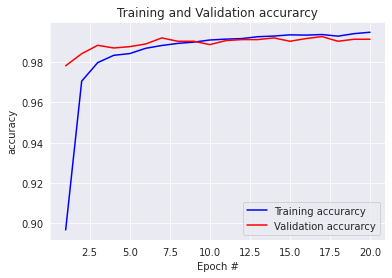

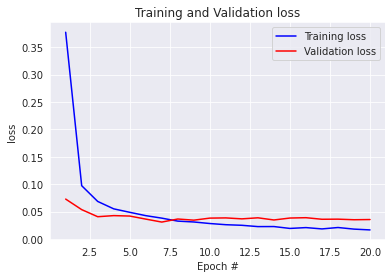

In [23]:
#Model_3 graphs

#get the details form the history object
acc5 = history_5.history['accuracy']
val_acc5 = history_5.history['val_accuracy']
loss5 = history_5.history['loss']
val_loss5 = history_5.history['val_loss']

epochs = range(1, len(acc5) + 1)

#Train and validation accuracy
plt.plot(epochs, acc5, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc5, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss5, 'b', label='Training loss')
plt.plot(epochs, val_loss5, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Q4:Compare the performances of the above three architectures with respect to the two datasets.

Accuracies:
* First model: 0.9890999794006348
* Second model: 0.9923999905586243
* Third model: 0.9901999831199646

Comparisons:
In the first two models the training accuracy is a bit higher than the validation accuracies which tells that the models are overfitting a bit. Whereas in case of the third model the validation and the training accuracy are almost the same which tells that the third model(with accuracy of 0.99) is the best model.

**Cifar10 dataset**

**Meta-Data** 

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

Each training and test example is assigned to one of the following labels:

* 0: airplane
* 1: automobile
* 2: bird
* 3: cat
* 4: deer
* 5: dog
* 6: frog
* 7: horse
* 8: ship
* 9: truck

In [24]:
#importing and loading the dataset
cifar10 = tf.keras.datasets.cifar10
(x_train2, y_train2),(x_test2,y_test2) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [25]:
#displaying the shape of the test and training instances

print('x_train shape:', x_train2.shape)
print(x_train2.shape[0], 'train samples')
print(x_test2.shape[0], 'test samples')
num_classes=len(np.unique(y_train2))
print(f'num of classes = {num_classes}')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
num of classes = 10


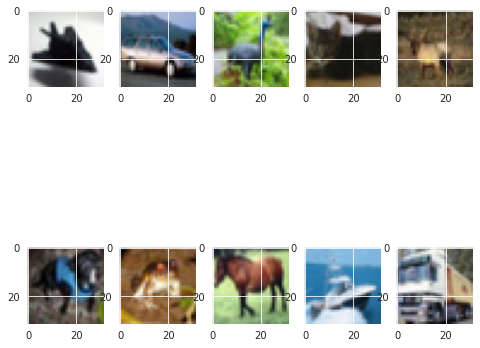

In [26]:
#display one image from each class
(x,id) = np.unique(y_train2, return_index=True)
plt.figure(figsize=(8,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train2[id[i]])

In [27]:
#printing maximum and minimum values
print(np.max(x_train2[0])) 
print(np.min(x_train2[0]))

255
0


In [28]:
#normalizing the dataset using min-max normalization

x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')
x_train2/= 255
x_test2 /= 255


Q1: Design a CNN with:
* One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
* One Pooling layer which uses MAXPOOLING with stride =2.
* One hidden layer having number of neurons = 100
* Note: use ReLU activation function after each convolution layer.

In [29]:
#Building the CNN model

model3=tf.keras.models.Sequential()
model3.add(tf.keras.Input(shape=(32,32,3)))

model3.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5),activation="relu", padding= "same" ,strides = (1,1)))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) ,strides = (2,2)))

model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(100, activation="relu"))
model3.add(tf.keras.layers.Dense(10, activation="softmax"))




In [30]:
#Compiling the above the CNN model

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001
model3.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [31]:
history_3 = model3.fit(x_train2, y_train2, batch_size=32, epochs=10 ,validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5270 - accuracy: 0.4528 - val_loss: 1.2774 - val_accuracy: 0.5594
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.2126 - accuracy: 0.5725 - val_loss: 1.1970 - val_accuracy: 0.5906
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0801 - accuracy: 0.6202 - val_loss: 1.1290 - val_accuracy: 0.6058
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9965 - accuracy: 0.6520 - val_loss: 1.0568 - val_accuracy: 0.6360
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9266 - accuracy: 0.6759 - val_loss: 1.0390 - val_accuracy: 0.6422
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8659 - accuracy: 0.6956 - val_loss: 1.0400 - val_accuracy: 0.6492
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8124 - accuracy: 0.7146 - val_loss: 1.0842 - val_accuracy:

In [32]:
score = model3.evaluate(x_test2, y_test2, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.1875721216201782
Test accuracy: 0.6204000115394592


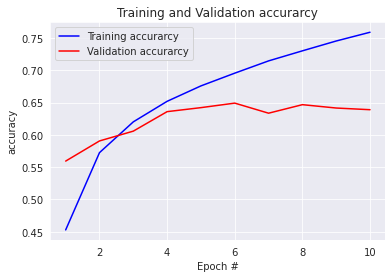

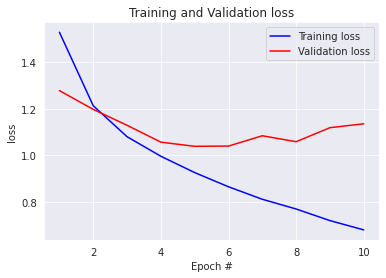

In [33]:
#Model_1 graphs

sns.set_style("darkgrid")

#get the details form the history object
acc3 = history_3.history['accuracy']
val_acc3 = history_3.history['val_accuracy']
loss3 = history_3.history['loss']
val_loss3 = history_3.history['val_loss']

epochs = range(1, len(acc3) + 1)

#Train and validation accuracy
plt.plot(epochs, acc3, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc3, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss3, 'b', label='Training loss')
plt.plot(epochs, val_loss3, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Q2: Design a CNN with:
* Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1 and, 
padding =0
* One Pooling layer which uses MAXPOOLING with stride =2.
* One hidden layer having number of neurons = 100
* Note: use ReLU activation function after each convolution layer.

In [34]:
#Building the CNN model

model4=tf.keras.models.Sequential()
model4.add(tf.keras.Input(shape=(32,32,3)))

model4.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu", padding= "same"))
model4.add(Dropout(0.02))

model4.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu", padding= "same"))
model4.add(Dropout(0.04))

model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model4.add(tf.keras.layers.Flatten())

model4.add(tf.keras.layers.Dense(100, activation="relu"))
model4.add(Dropout(0.04))

model4.add(tf.keras.layers.Dense(10, activation="softmax"))




In [35]:
#Compiling the CNN model

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001
model4.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


In [36]:
history_4= model4.fit(x_train2, y_train2, batch_size=64, epochs=10,validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 5s 7ms/step - loss: 1.5377 - accuracy: 0.4449 - val_loss: 1.2350 - val_accuracy: 0.5698
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 1.1406 - accuracy: 0.5954 - val_loss: 1.0615 - val_accuracy: 0.6308
Epoch 3/10
704/704 [==============================] - 4s 6ms/step - loss: 0.9913 - accuracy: 0.6500 - val_loss: 0.9725 - val_accuracy: 0.6586
Epoch 4/10
704/704 [==============================] - 4s 6ms/step - loss: 0.9001 - accuracy: 0.6804 - val_loss: 0.9689 - val_accuracy: 0.6632
Epoch 5/10
704/704 [==============================] - 4s 6ms/step - loss: 0.8266 - accuracy: 0.7068 - val_loss: 0.9336 - val_accuracy: 0.6788
Epoch 6/10
704/704 [==============================] - 5s 7ms/step - loss: 0.7678 - accuracy: 0.7272 - val_loss: 0.9209 - val_accuracy: 0.6818
Epoch 7/10
704/704 [==============================] - 4s 6ms/step - loss: 0.7047 - accuracy: 0.7489 - val_loss: 0.9732 - val_accuracy: 0.6726
Epoch 

In [37]:
score = model4.evaluate(x_test2, y_test2, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.0956934690475464
Test accuracy: 0.6503000259399414


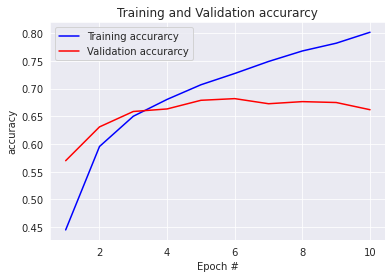

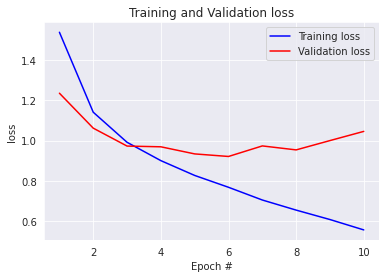

In [38]:
#Model_2 graphs

sns.set_style("darkgrid")

#get the details form the history object
acc4 = history_4.history['accuracy']
val_acc4 = history_4.history['val_accuracy']
loss4 = history_4.history['loss']
val_loss4 = history_4.history['val_loss']

epochs = range(1, len(acc4) + 1)

#Train and validation accuracy
plt.plot(epochs, acc4, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc4, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss4, 'b', label='Training loss')
plt.plot(epochs, val_loss4, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Q3: Design the LeNet-5 architecture 

In [39]:
model_6 = tf.keras.models.Sequential()

model_6.add(tf.keras.Input(shape=((32, 32, 3))))

model_6.add(tf.keras.layers.Conv2D(6, kernel_size = (5,5), padding='same', activation='tanh', strides = (1,1)))
model_6.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2), strides = (2,2)))
model_6.add(Dropout(0.1))

model_6.add(tf.keras.layers.Conv2D(16, kernel_size = (5,5), padding='same', activation='tanh', strides = (1,1)))
model_6.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2), strides = (2,2)))
model_6.add(Dropout(0.1))

model_6.add(tf.keras.layers.Flatten())

model_6.add(tf.keras.layers.Dense(120, activation='sigmoid'))
model_6.add(Dropout(0.1))

model_6.add(tf.keras.layers.Dense(84, activation='sigmoid'))
model_6.add(Dropout(0.1))

model_6.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))

In [40]:
#Compiling the above CNN model

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001
model_6.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [41]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 6)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 16)         

In [42]:
history_6 = model_6.fit(x_train2, y_train2, batch_size=32, epochs=25, validation_split=0.1)

Epoch 1/25
1407/1407 [==============================] - 7s 4ms/step - loss: 1.6912 - accuracy: 0.3808 - val_loss: 1.4749 - val_accuracy: 0.4658
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4174 - accuracy: 0.4880 - val_loss: 1.2989 - val_accuracy: 0.5324
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3081 - accuracy: 0.5292 - val_loss: 1.2014 - val_accuracy: 0.5664
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2310 - accuracy: 0.5564 - val_loss: 1.1900 - val_accuracy: 0.5756
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1709 - accuracy: 0.5813 - val_loss: 1.1224 - val_accuracy: 0.5918
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1240 - accuracy: 0.5997 - val_loss: 1.1115 - val_accuracy: 0.6078
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0823 - accuracy: 0.6132 - val_loss: 1.0599 - val_accuracy:

In [43]:
test_loss, test_acc = model_6.evaluate(x_test2, y_test2)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9713 - accuracy: 0.6635
Test loss 0.9712706804275513
Test accuracy 0.6635000109672546


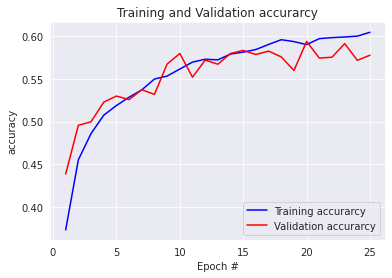

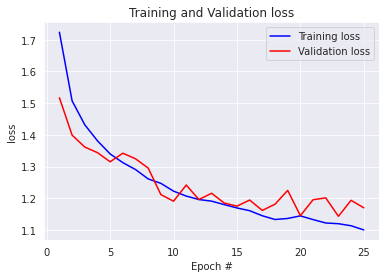

In [ ]:
#Model_3 graphs

#get the details form the history object
acc6 = history_6.history['accuracy']
val_acc6 = history_6.history['val_accuracy']
loss6 = history_6.history['loss']
val_loss6 = history_6.history['val_loss']

epochs = range(1, len(acc6) + 1)

#Train and validation accuracy
plt.plot(epochs, acc6, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc6, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss6, 'b', label='Training loss')
plt.plot(epochs, val_loss6, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Q4:Compare the performances of the above three architectures with respect to the two datasets.

  Comparisons:
  
  The test accuracies are: 
* Ist model: 0.6204000115394592
* 2nd model: 0.6503000259399414
* 3rd model 0.6635000109672546

Clearly in the 1st and 2nd model the test accuracies are overshooting the validation accuracies. Hence the third model
where the test accuracy and validation accuracy are almost close to each other is the best model among all.